In [1]:
print("Hello World")

Hello World


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from PIL import Image

In [14]:
data_dir = "garbage"

data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(f"Nombre d'images: {image_count}")

Nombre d'images: 2281


In [31]:
img = PIL.Image.open(str(next(data_dir.glob('metal/*'))))

img_height, img_width = img.size
batch_size = 32
val_split = 0.3

In [32]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=val_split,
  subset="training",
  seed=5336,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=val_split,
  subset="validation",
  seed=5336,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

class_names = train_ds.class_names

Found 2281 files belonging to 6 classes.
Using 1597 files for training.
Found 2281 files belonging to 6 classes.
Using 684 files for validation.
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


2022-10-18 17:21:29.106427: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 75497472 exceeds 10% of free system memory.


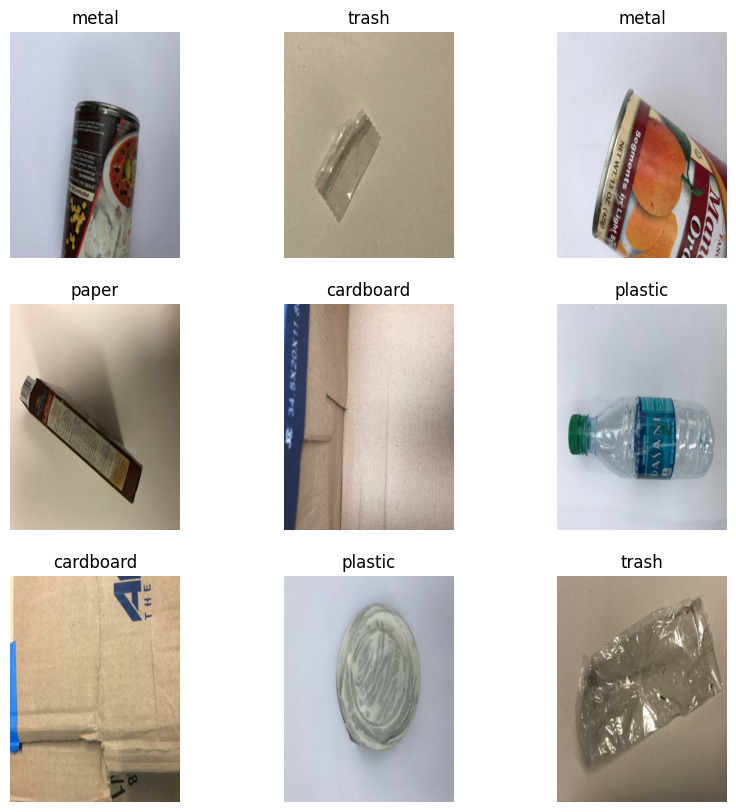

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
